# image_samples.ipynb

Plots sample crop images.

Author: Connacher Murphy

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import pest_classification as pest
from torch.utils.data import DataLoader

from types import SimpleNamespace

config = SimpleNamespace(**{})

In [2]:
# CCMT path
path = os.path.expanduser("~/data/ccmt/CCMT Dataset-Augmented")
# path = os.path.expanduser("~/data/ccmt")
print(os.listdir(path))

['Cassava', 'Tomato', 'Cashew', 'Maize']


In [3]:
# CM: move this into py script

# Compile file paths into a dataframe
crops = ["Maize"]  # just maize for now

crop_classes = {}
data = []

for crop in crops:
    # Loop through crop-specific classes
    crop_classes[crop] = os.listdir(os.path.join(path, crop, "train_set"))
    if ".DS_Store" in crop_classes[crop]:
        crop_classes[crop].remove(".DS_Store")

    for crop_class in crop_classes[crop]:
        # Loop through images in each class
        for set in ["train_set", "test_set"]:
            for roots, dirs, files in os.walk(os.path.join(path, crop, set, crop_class)):
                for file in files:
                    data.append((crop, set, crop_class, os.path.join(crop, set, crop_class, file)))
        
print(data)
df = pd.DataFrame(data, columns=["crop", "set", "crop_class", "file"])

[('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/2855maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/1981maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/405maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/97maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/1835maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/364maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/3577maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/718maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/1196maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/2697maize_train_lea

In [4]:
df  # list file path df

df["crop_class"].unique()

array(['leaf beetle', 'healthy', 'leaf blight', 'grasshoper',
       'fall armyworm', 'streak virus', 'leaf spot'], dtype=object)

Maize leaf beetle


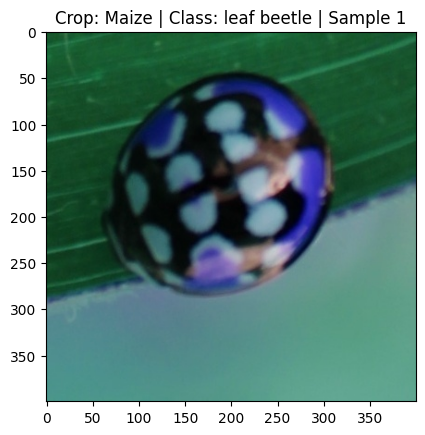

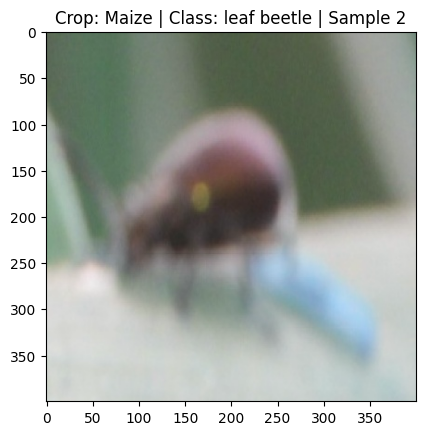

Maize healthy


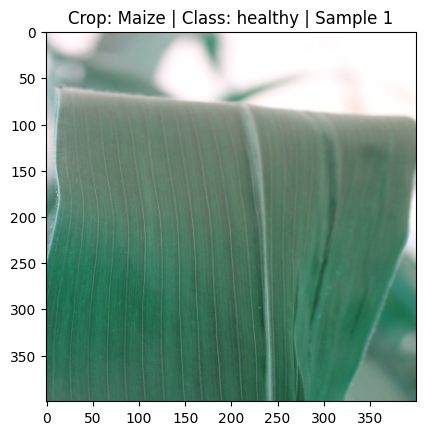

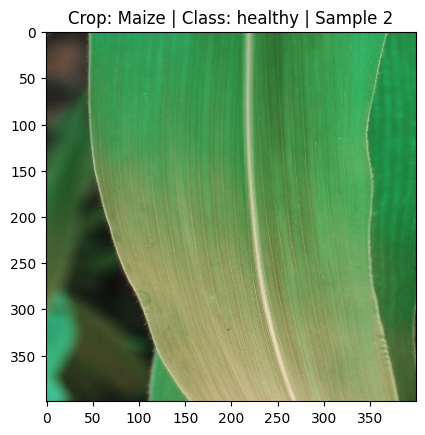

Maize leaf blight


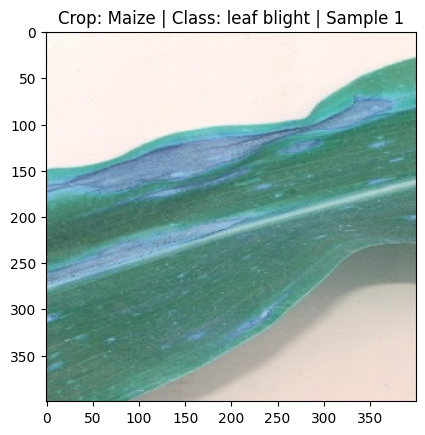

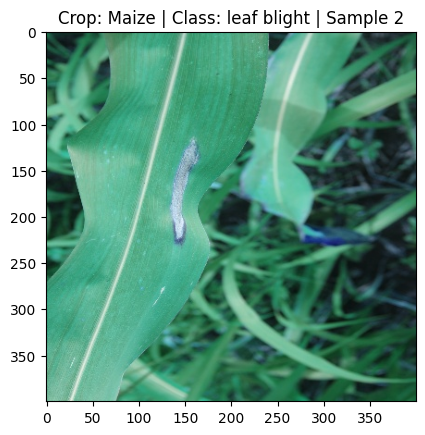

Maize grasshoper


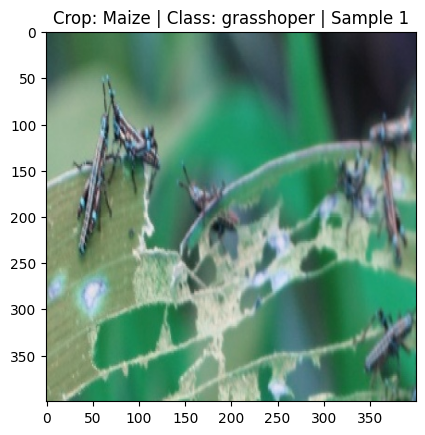

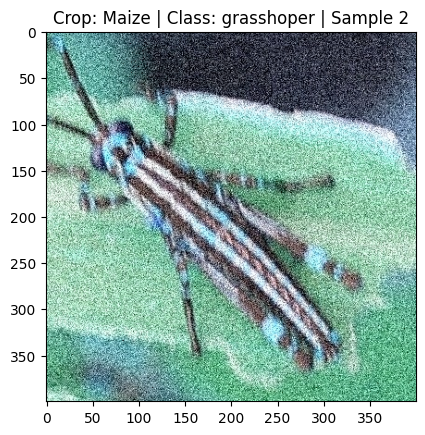

Maize fall armyworm


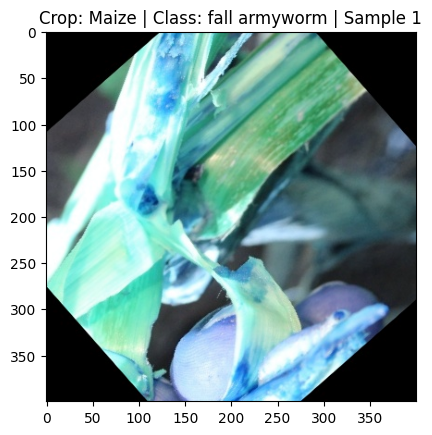

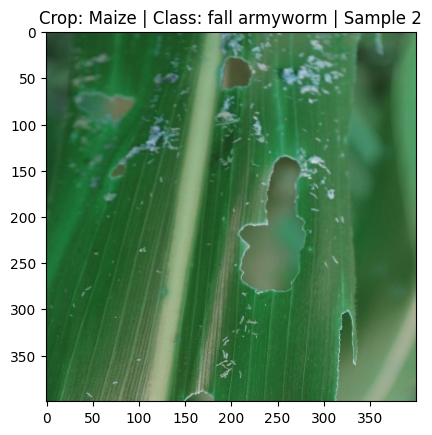

Maize streak virus


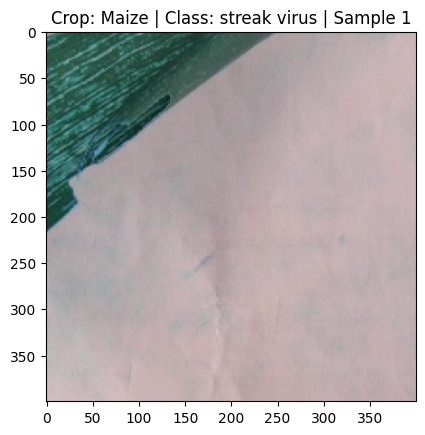

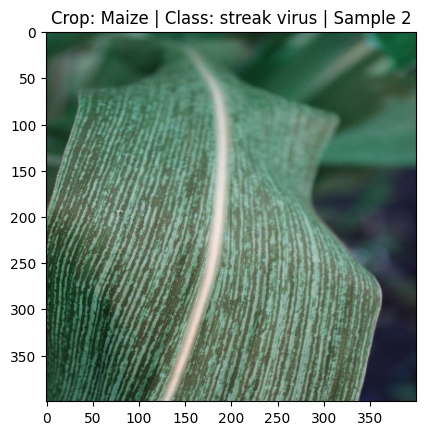

Maize leaf spot


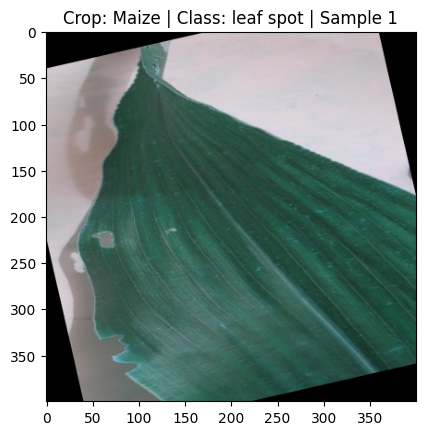

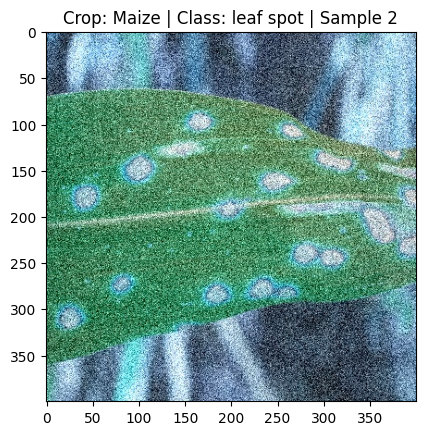

In [5]:
# Plot sample few images
for crop in crops:
    for crop_class in crop_classes[crop]:
        print(crop, crop_class)
        for i in range(2):
            img = cv2.imread(
                os.path.join(
                    path,
                    df[
                        (df["crop"] == crop)
                        & (df["set"] == "train_set")
                        & (df["crop_class"] == crop_class)
                    ]["file"].iloc[i],
                )
            )

            plt.imshow(img)
            plt.title(f"Crop: {crop} | Class: {crop_class} | Sample {i + 1}")
            plt.show()

In [6]:
config.batch_size = 32

config.image_dir = os.path.expanduser("~/data/ccmt/CCMT Dataset-Augmented")
config.image_size = 256

example_dataset = pest.AugmentedCCMT(config, df)

example_dataloader = DataLoader(
    example_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    num_workers=0,
)

In [12]:
for (image_batch, label_batch) in example_dataloader:
    print(image_batch.shape)
    print(len(label_batch))
    break

torch.Size([32, 3, 256, 256])
32
